# 2A.ml - Statistiques descriptives avec scikit-learn - correction

ACP, CAH, régression linéaire, correction.

In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

In [3]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [4]:
# Répare une incompatibilité entre scipy 1.0 et statsmodels 0.8.
from pymyinstall.fix import fix_scipy10_for_statsmodels08
fix_scipy10_for_statsmodels08()

### Prérequis de l'énoncé

In [5]:
import pyensae
f = pyensae.download_data("dads2011_gf_salaries11_dbase.zip",
                          website="https://www.insee.fr/fr/statistiques/fichier/2011542/")

import pandas
try:
    from dbfread import DBF
    use_dbfread = True
except ImportError as e :
    use_dbfread = False
    
if use_dbfread:
    import os
    from pyensae.sql.database_exception import ExceptionSQL
    from pyensae.datasource import dBase2sqllite
    print("convert dbase into sqllite")
    try:
        dBase2sqllite("salaries2011.db3", "varlist_salaries11.dbf", overwrite_table="varlist")
        dBase2sqllite("salaries2011.db3", "varmod_salaries11.dbf", overwrite_table="varmod")
        dBase2sqllite("salaries2011.db3", 'salaries11.dbf', overwrite_table="salaries", fLOG = print)
    except ExceptionSQL:
        print("La base de données est déjà renseignée.")
else :
    print("use of zipped version")
    import pyensae
    db3 = pyensae.download_data("salaries2011.zip")
    # pour aller plus vite, données à télécharger au
    # http://www.xavierdupre.fr/enseignement/complements/salaries2011.zip

convert dbase into sqllite
La base de données est déjà renseignée.


### Exercice 1 : CAH (classification ascendante hiérarchique)

Le point commun de ces méthodes est qu'elles ne sont pas supervisées. L'objectif est de réduire la complexité des données. Réduire le nombre de dimensions pour l'ACP ou segmenter les observations pour les k-means et la CAH.

In [6]:
import pandas, numpy, matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pyensae

pyensae.download_data("eleve_region.txt")
df = pandas.read_csv("eleve_region.txt", sep="\t", encoding="utf8", index_col=0)
print(df.shape)
df.head(n=5)

(27, 21)


,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
académie,,,,,,,,,,,,,,,,,,,,,
Aix-Marseille,241357,242298,242096,242295,243660,244608,245536,247288,249331,250871,...,250622,248208,245755,243832,242309,240664,240432,241336,239051,240115
Amiens,198281,196871,195709,194055,192893,191862,189636,185977,183357,180973,...,175610,172110,168718,165295,163116,162548,163270,164422,165275,166345
Besançon,116373,115600,114282,113312,112076,110261,108106,105463,103336,102264,...,100117,98611,97038,95779,95074,94501,94599,94745,94351,94613
Bordeaux,253551,252644,249658,247708,247499,245757,244992,243047,243592,245198,...,244805,244343,242602,242933,243146,244336,246806,250626,252085,255761
Caen,145435,144369,141883,140658,139585,137704,135613,133255,131206,129271,...,125552,123889,122550,121002,119857,119426,119184,119764,119010,119238


In [7]:
for c in df.columns:
    if c != "1993":
        df[c] /= df ["1993"]
df["1993"] /= df["1993"]
df.head()

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
académie,,,,,,,,,,,,,,,,,,,,,
Aix-Marseille,1.0,1.003899,1.003062,1.003886,1.009542,1.013470,1.017315,1.024574,1.033038,1.039419,...,1.038387,1.028385,1.018222,1.010255,1.003944,0.997129,0.996168,0.999913,0.990446,0.994854
Amiens,1.0,0.992889,0.987029,0.978687,0.972826,0.967627,0.956400,0.937947,0.924733,0.912710,...,0.885662,0.868011,0.850904,0.833640,0.822651,0.819786,0.823427,0.829237,0.833539,0.838936
Besançon,1.0,0.993358,0.982032,0.973697,0.963076,0.947479,0.928961,0.906250,0.887972,0.878761,...,0.860311,0.847370,0.833853,0.823035,0.816976,0.812053,0.812895,0.814149,0.810764,0.813015
Bordeaux,1.0,0.996423,0.984646,0.976955,0.976131,0.969261,0.966243,0.958572,0.960722,0.967056,...,0.965506,0.963684,0.956817,0.958123,0.958963,0.963656,0.973398,0.988464,0.994218,1.008716
Caen,1.0,0.992670,0.975577,0.967154,0.959776,0.946842,0.932465,0.916251,0.902162,0.888858,...,0.863286,0.851851,0.842644,0.832001,0.824128,0.821164,0.819500,0.823488,0.818304,0.819871


In [8]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(linkage='ward', compute_full_tree=True).fit(df)
ward

AgglomerativeClustering(compute_full_tree=True)

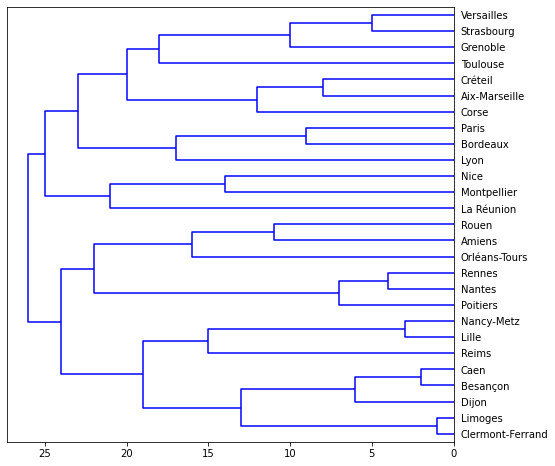

In [9]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

dendro = [ ]
for a,b in ward.children_:
    dendro.append([a, b, float(len(dendro)+1), len(dendro)+1])
    # le dernier coefficient devrait contenir le nombre de feuilles dépendant de ce noeud
    # et non le dernier indice
    # de même, le niveau (3ème colonne) ne devrait pas être le nombre de noeud
    # mais la distance de Ward
    
fig = plt.figure( figsize=(8,8) )
ax = fig.add_subplot(1,1,1) 
r = dendrogram(dendro, color_threshold=1, labels=list(df.index),
               show_leaf_counts=True, ax=ax, orientation="left")

Je reprends également le graphique montrant la matrice de corrélations qu'on peut également obtenir avec [seaborn : clustermap](https://seaborn.pydata.org/examples/structured_heatmap.html).

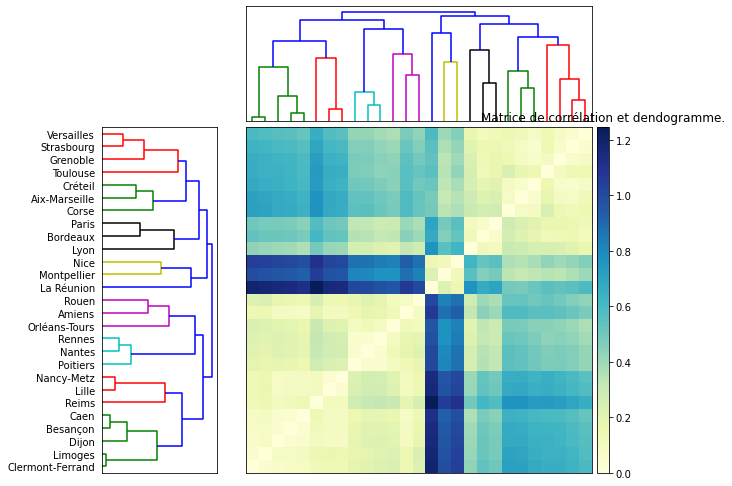

In [10]:
from scipy.spatial.distance import pdist, squareform

data_dist = pdist(df)

fig = plt.figure(figsize=(8,8))

# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Z1 = dendrogram(dendro, orientation='right',labels=list(df.index))
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(dendro)
ax2.set_xticks([])
ax2.set_yticks([])

# Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']

D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.title("Matrice de corrélation et dendogramme.");

### Exercice 2 : régression linéaire

Ce sont trois méthodes supervisées : on s'en sert pour expliquer prédire le lien entre deux variables $X$ et $Y$ (ou ensemble de variables) ou prédire $Y$ en fonction de $X$. On suppose que les données ont déjà été téléchargées (voir l'énoncé de cet exercice). On continue avec l'extraction de l'âge, du sexe et du salaire comme indiqué dans l'énoncé.

In [11]:
import sqlite3, pandas
con = sqlite3.connect("salaries2011.db3")
df = pandas.io.sql.read_sql("select * from varmod", con)
con.close()

values = df[ df.VARIABLE == "TRNNETO"].copy()

def process_intervalle(s):
    # [14 000 ; 16 000[ euros
    acc = "0123456789;+"
    s0 = "".join(c for c in s if c in acc)
    spl = s0.split(';')
    if len(spl) != 2:
        raise ValueError("Unable to process '{0}'".format(s0))
    try:
        a = float(spl[0])
    except Exception as e:
        raise ValueError("Cannot interpret '{0}' - {1}".format(s, spl))
    b = float(spl[1]) if "+" not in spl[1] else None
    if b is None:
        return a
    return (a+b) / 2.0

values["montant"] = values.apply(lambda r : process_intervalle(r["MODLIBELLE"]), axis=1)
values.head()

,VARIABLE,MODALITE,MODLIBELLE,montant
8957,TRNNETO,00,[0 ; 200[ euros,100.0
8958,TRNNETO,01,[200 ; 500[ euros,350.0
8959,TRNNETO,02,[500 ; 1 000[ euros,750.0
8960,TRNNETO,03,[1 000 ; 1 500[ euros,1250.0
8961,TRNNETO,04,[1 500 ; 2 000[ euros,1750.0


In [12]:
import sqlite3, pandas
con = sqlite3.connect("salaries2011.db3")
data = pandas.io.sql.read_sql("select TRNNETO,AGE,SEXE from salaries", con)
con.close()

salaires = data.merge (values, left_on="TRNNETO", right_on="MODALITE" )
salaires["M"] = salaires.apply(lambda r: 1 if r["SEXE"] == "1" else 0, axis=1)
salaires["F"] = salaires.apply(lambda r: 1 if r["SEXE"] == "2" else 0, axis=1)
data = salaires[["AGE","M","F","montant"]]
data = data [data.M + data.F > 0]
data.head()

,AGE,M,F,montant
0,49.0,1,0,750.0
1,27.0,1,0,750.0
2,22.0,1,0,750.0
3,26.0,1,0,750.0
4,29.0,0,1,750.0


On supprime les valeurs manquantes :

In [13]:
nonull = data.dropna().copy()
nonull.shape

(2240691, 4)

#### version scikit-learn

La [régression linéraire](http://scikit-learn.org/stable/modules/linear_model.html) suit :

In [14]:
nonull[["AGE","M"]].dropna().shape

(2240691, 2)

In [15]:
from sklearn import linear_model
clf = linear_model.LinearRegression()
clf.fit (nonull[["AGE","M"]].values, nonull.montant.values)
clf.coef_, clf.intercept_, "R^2=", clf.score(
    nonull[["AGE","M"]], nonull.montant)

(array([ 310.98873096, 4710.02901965]),
 4927.219006697269,
 'R^2=',
 0.13957345814666222)

On prend un échantillon aléatoire :

In [16]:
import random
val = nonull.copy()
val["rnd"] = val.apply(lambda r: random.randint(0, 1000), axis=1)
ech = val[val["rnd"] == 1]
ech.shape

(2188, 5)

On sépare homme et femmes :

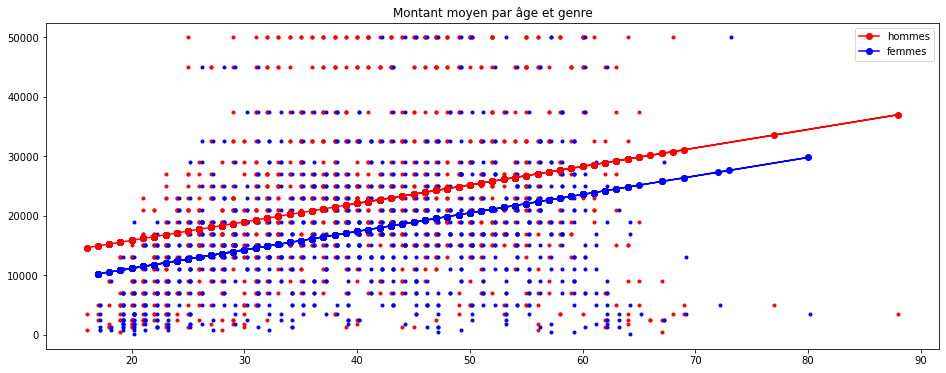

In [17]:
homme = ech[ech.M == 1]
femme = ech[ech.M == 0]

predh = clf.predict(homme[["AGE","M"]])
predf = clf.predict(femme[["AGE","M"]])

import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.plot(homme.AGE, homme.montant, "r.")
plt.plot(femme.AGE + 0.2, femme.montant, "b.")
plt.plot(homme.AGE, predh, "ro-", label="hommes")
plt.plot(femme.AGE, predf, "bo-", label="femmes")
plt.legend()
plt.title("Montant moyen par âge et genre");

#### version statsmodels

In [18]:
import statsmodels.api as sm
nonull["one"] = 1.0  # on ajoute la constante
model = sm.OLS(nonull.montant, nonull [["AGE","M", "one"]])
results = model.fit()
print("coefficients",results.params)
results.summary()

c:\python372_x64\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


coefficients AGE     310.988731
M      4710.029020
one    4927.219007
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                montant   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                 1.817e+05
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        10:43:44   Log-Likelihood:            -2.4023e+07
No. Observations:             2240691   AIC:                         4.805e+07
Df Residuals:                 2240688   BIC:                         4.805e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AGE          310.9887      0.600    518.682      0.000     309.814     312.164
M           4710.0290     14.658    321.323      0.000    4681.299    4738.759
one         4927.2190     26.032    189.272      0.000    4876.196    4978.242
==============================================================================
Omnibus:                   132298.944   Durbin-Watson:                   0.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           158649.997
Skew:                           0.614   Prob(JB):                         0.00
Kurtosis:                       3.440   Cond. No.                         150.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On reproduit le même dessin :

In [19]:
import random
val = nonull.copy()
val["rnd"] = val.apply(lambda r: random.randint(0,1000), axis=1)
ech = val[val["rnd"] == 1]

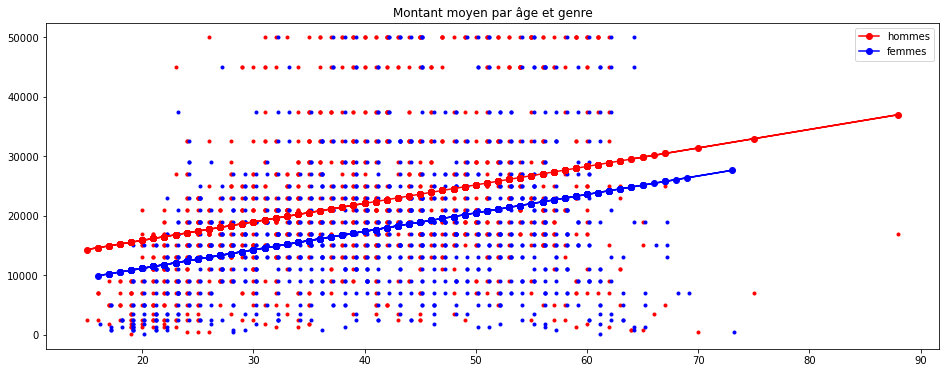

In [20]:
homme = ech [ ech.M == 1]
femme = ech [ ech.M == 0]

predh = results.predict(homme[["AGE","M","one"]])
predf = results.predict(femme[["AGE","M","one"]])

import matplotlib.pyplot as plt
def graph(homme, femme, predh, predf):
    fig = plt.figure(figsize=(16,6))
    ax = plt.subplot("111")
    ax.plot(homme.AGE, homme.montant, "r.")
    ax.plot(femme.AGE + 0.2, femme.montant, "b.")
    ax.plot(homme.AGE, predh, "ro-", label="hommes")
    ax.plot(femme.AGE, predf, "bo-", label="femmes")
    ax.legend()
    ax.set_title("Montant moyen par âge et genre");
    return ax

graph(homme, femme, predh, predf);

On ajoute l'intervalle de confiance sur un échantillon :

In [21]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

prstd, iv_l, iv_u = wls_prediction_std(results)

val = nonull.copy()
val["rnd"] = val.apply(lambda r: random.randint(0, 1000), axis=1)
val["pred"] = prstd
val["up"] = iv_u
val["down"] = iv_l

ech = val[val["rnd"] == 1]
ech.head()

,AGE,M,F,montant,one,rnd,pred,up,down
1772,17.0,0,1,750.0,1.0,1,10964.554865,31704.171684,-11276.116818
3409,44.0,1,0,750.0,1.0,1,10964.546573,44810.880186,1830.624191
3683,18.0,1,0,750.0,1.0,1,10964.553468,36725.186695,-6255.096328
3701,21.0,0,1,750.0,1.0,1,10964.552144,32948.121273,-10032.156559
4655,33.0,1,0,750.0,1.0,1,10964.546785,41390.004562,-1590.252265


Puis on l'ajoute au graphe précédent :

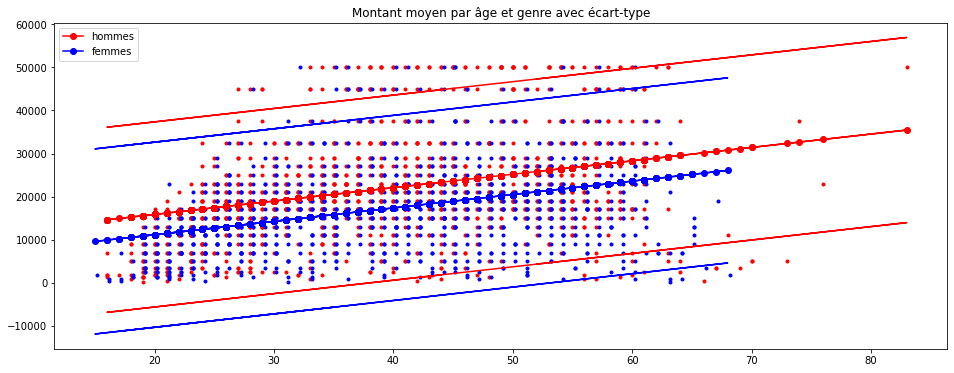

In [22]:
homme = ech[ech.M == 1]
femme = ech[ech.M == 0]

predh = results.predict(homme[["AGE","M","one"]])
predf = results.predict(femme[["AGE","M","one"]])

ax = graph(homme, femme, predh, predf)
ax.plot(homme.AGE, homme.up, 'r-')
ax.plot(homme.AGE, homme.down, 'r-')
ax.plot(femme.AGE, femme.up, 'b-')
ax.plot(femme.AGE, femme.down, 'b-')
ax.set_title("Montant moyen par âge et genre avec écart-type");